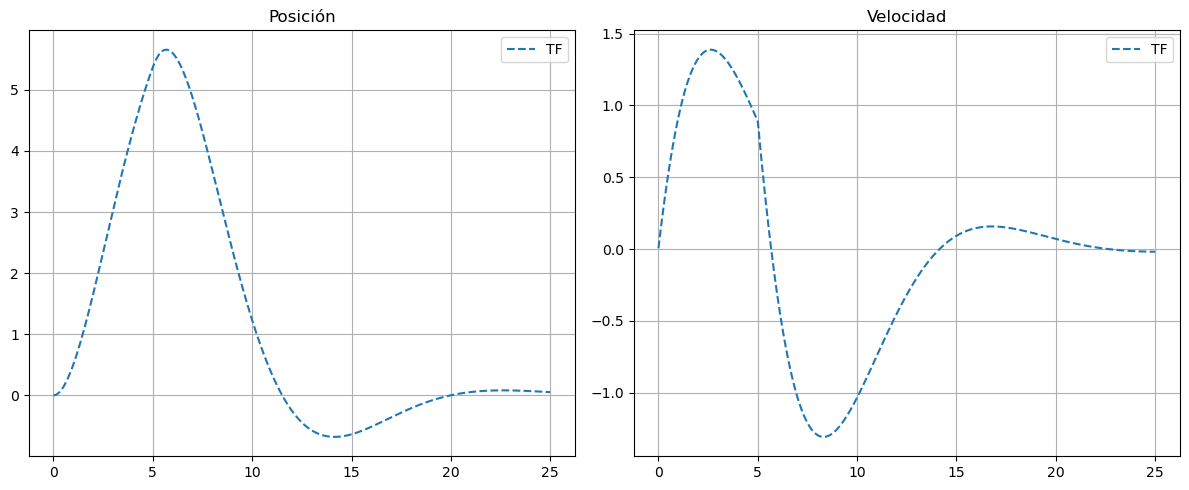

In [1]:
from scipy.signal import TransferFunction, lsim
import numpy as np

def simular_mecanico_tf(m, c, k, F, time):
    """
    Simula el sistema mecánico usando función de transferencia (TransferFunction + lsim)
    """
    # Crear el sistema
    num = [1]
    den = [m, c, k]
    sistema = TransferFunction(num, den)

    # Simular
    t_out, y_out, _ = lsim(sistema, U=F, T=time)

    # Calcular velocidad por derivada numérica
    velocidad = np.gradient(y_out, time)

    return t_out, y_out, velocidad  # tiempo, posición, velocidad

# Definir parámetros y fuerza
m = 1
c = 0.5
k = 0.2
time = np.arange(0, 25.01, 0.01)
F = np.where(time <= 5, 1.2, 0)

# Llamar a las funciones
#t_ode, pos_ode, vel_ode = simular_mecanico_ode(m, c, k, F, time)
t_tf, pos_tf, vel_tf = simular_mecanico_tf(m, c, k, F, time)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
#plt.plot(t_ode, pos_ode, label='ODE')
plt.plot(t_tf, pos_tf, '--', label='TF')
plt.title('Posición')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
#plt.plot(t_ode, vel_ode, label='ODE')
plt.plot(t_tf, vel_tf, '--', label='TF')
plt.title('Velocidad')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
